Exploracion de datos en una base con NA
Tablas de resumen
Graficos

### Pandas

Pandas es una biblioteca de software escrita en el lenguaje de programación Python para la manipulación y el análisis de datos.
Objeto DataFrame para manipulación de datos con indexación integrada.
Permite:
- Leer y escribir datos  en memoria y en diferentes formatos de archivo
- Manejo integrado de missing values
- Modificación y tablas de un conjunto de datos
- Segmentación de la base de datos basada en etiquetas, indexación elegante y extracción de subconjunto de la base original
- Inserción y eliminación de columnas en el df
- Agrupaciones, combinaciones, uniones y filtros de conjuntos de datos
- Funcionalidad de series de tiempo: generación de rango de fechas y conversión de frecuencia, estadísticas de ventana móvil, regresiones lineales de ventana móvil, cambio de fecha e implementación de rezagos


### 1. Importar las librerías necesarias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importar el dataset

In [3]:
df=pd.read_excel('train.xlsx')

### 3. EDA

In [4]:
df.head(10) # El número en el paréntesis le indica al método cuántas observaciones desplegar


,id_pasajero,supervivencia,clase,nombre,sexo,edad,hermanos_esposos,padres_ninos,ticket,precio,cabina,puerto
0,1,0,3,"Braund, Mr. Owen Harris",masculino,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femenino,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",femenino,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",femenino,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",masculino,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",masculino,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",masculino,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",masculino,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",femenino,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",femenino,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.tail(3)

,id_pasajero,supervivencia,clase,nombre,sexo,edad,hermanos_esposos,padres_ninos,ticket,precio,cabina,puerto
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",femenino,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",masculino,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",masculino,32.0,0,0,370376,7.75,NaN,Q


### Resúmenes

.describe()
.info()

In [6]:
df.describe()

,id_pasajero,supervivencia,clase,edad,hermanos_esposos,padres_ninos,precio
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Podemos ver que el recuento de la columna Edad es 714, la media es 29.6 años, la desviación estándar es 14.52 y así sucesivamente. 
Gracias al recuento, podemos entender que faltan algunos valores en esta columna. Nos ocuparemos de ellos más tarde.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_pasajero       891 non-null    int64  
 1   supervivencia     891 non-null    int64  
 2   clase             891 non-null    int64  
 3   nombre            891 non-null    object 
 4   sexo              891 non-null    object 
 5   edad              714 non-null    float64
 6   hermanos_esposos  891 non-null    int64  
 7   padres_ninos      891 non-null    int64  
 8   ticket            891 non-null    object 
 9   precio            891 non-null    float64
 10  cabina            204 non-null    object 
 11  puerto            889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Este método imprime información sobre un DataFrame, incluido el tipo de índice y los tipos de columna, los valores no nulos y el uso de memoria.

In [8]:
df.dtypes

id_pasajero           int64
supervivencia         int64
clase                 int64
nombre               object
sexo                 object
edad                float64
hermanos_esposos      int64
padres_ninos          int64
ticket               object
precio              float64
cabina               object
puerto               object
dtype: object

### Ordenar datos conforme a una columna

In [9]:
df.columns

Index(['id_pasajero', 'supervivencia', 'clase', 'nombre', 'sexo', 'edad',
       'hermanos_esposos', 'padres_ninos', 'ticket', 'precio', 'cabina',
       'puerto'],
      dtype='object')

In [10]:
df.sort_values("precio").head(5)

,id_pasajero,supervivencia,clase,nombre,sexo,edad,hermanos_esposos,padres_ninos,ticket,precio,cabina,puerto
271,272,1,3,"Tornquist, Mr. William Henry",masculino,25.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",masculino,49.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",masculino,19.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",masculino,NaN,0,0,112052,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",masculino,NaN,0,0,239853,0.0,NaN,S


In [11]:
df.sort_values("precio", ascending=False).head(5)

,id_pasajero,supervivencia,clase,nombre,sexo,edad,hermanos_esposos,padres_ninos,ticket,precio,cabina,puerto
258,259,1,1,"Ward, Miss. Anna",femenino,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",masculino,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",masculino,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",femenino,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",masculino,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [12]:
#Reasignaciones vs inplace argument

### Contar la ocurrencia de los casos

In [13]:
# Seleccionar una columna
df.sexo

0      masculino
1       femenino
2       femenino
3       femenino
4      masculino
         ...    
886    masculino
887     femenino
888     femenino
889    masculino
890    masculino
Name: sexo, Length: 891, dtype: object

In [14]:
df["sexo"]

0      masculino
1       femenino
2       femenino
3       femenino
4      masculino
         ...    
886    masculino
887     femenino
888     femenino
889    masculino
890    masculino
Name: sexo, Length: 891, dtype: object

In [15]:
df.sexo.value_counts()

masculino    577
femenino     314
Name: sexo, dtype: int64

### La función unique para determinar los niveles en una variable y su frecuencia

In [16]:
df.nunique()

id_pasajero         891
supervivencia         2
clase                 3
nombre              891
sexo                  2
edad                 88
hermanos_esposos      7
padres_ninos          7
ticket              681
precio              248
cabina              147
puerto                3
dtype: int64

### Coerciones de variables en pandas

Vimos que el tipo de columna puert era un objeto. Después de contar los valores únicos en la columna puerto con .unique (), podemos ver que hay 3 valores únicos en esa columna. Entonces podemos considerar que el tipo de datos debe ser categórico. 
Para cambiar el tipo de datos de esa columna, se debe ejecutar el siguiente código:

In [17]:
df["puerto"] = df["puerto"].astype("category")
df["puerto"].dtype

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False)

### Filtros

In [18]:
df.puerto == "C" # Ojo al doble igual

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889     True
890    False
Name: puerto, Length: 891, dtype: bool

Si queremos extraer efectivamente los valores evaluados como verdaderos utilizamos la notacion []

In [19]:
df[df.puerto=="C"]

,id_pasajero,supervivencia,clase,nombre,sexo,edad,hermanos_esposos,padres_ninos,ticket,precio,cabina,puerto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femenino,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",femenino,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",femenino,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",masculino,NaN,0,0,2631,7.2250,NaN,C
30,31,0,1,"Uruchurtu, Don. Manuel E",masculino,40.0,0,0,PC 17601,27.7208,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",femenino,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",femenino,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",femenino,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",femenino,56.0,0,1,11767,83.1583,C50,C


In [20]:
df[(df.puerto=='C') & (df.sexo=='masculino')]

,id_pasajero,supervivencia,clase,nombre,sexo,edad,hermanos_esposos,padres_ninos,ticket,precio,cabina,puerto
26,27,0,3,"Emir, Mr. Farred Chehab",masculino,NaN,0,0,2631,7.2250,NaN,C
30,31,0,1,"Uruchurtu, Don. Manuel E",masculino,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",masculino,28.0,1,0,PC 17604,82.1708,NaN,C
36,37,1,3,"Mamee, Mr. Hanna",masculino,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",masculino,NaN,0,0,349253,7.8958,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",masculino,NaN,0,0,11774,29.7000,C47,C
843,844,0,3,"Lemberopolous, Mr. Peter L",masculino,34.5,0,0,2683,6.4375,NaN,C
847,848,0,3,"Markoff, Mr. Marin",masculino,35.0,0,0,349213,7.8958,NaN,C
859,860,0,3,"Razi, Mr. Raihed",masculino,NaN,0,0,2629,7.2292,NaN,C


In [21]:
df[(df.puerto=='C') | (df.puerto=='S')]

,id_pasajero,supervivencia,clase,nombre,sexo,edad,hermanos_esposos,padres_ninos,ticket,precio,cabina,puerto
0,1,0,3,"Braund, Mr. Owen Harris",masculino,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femenino,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",femenino,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",femenino,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",masculino,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",masculino,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",masculino,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",femenino,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",femenino,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Valores perdidos

In [22]:
df.isnull()

,id_pasajero,supervivencia,clase,nombre,sexo,edad,hermanos_esposos,padres_ninos,ticket,precio,cabina,puerto
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().sum()

id_pasajero           0
supervivencia         0
clase                 0
nombre                0
sexo                  0
edad                177
hermanos_esposos      0
padres_ninos          0
ticket                0
precio                0
cabina              687
puerto                2
dtype: int64

### Eliminar una columna e imputar valores perdidos con la mediana

In [24]:
df.drop(labels = ["cabina"], axis=1).head()

,id_pasajero,supervivencia,clase,nombre,sexo,edad,hermanos_esposos,padres_ninos,ticket,precio,puerto
0,1,0,3,"Braund, Mr. Owen Harris",masculino,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femenino,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",femenino,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",femenino,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",masculino,35.0,0,0,373450,8.0500,S


In [25]:
df.columns

Index(['id_pasajero', 'supervivencia', 'clase', 'nombre', 'sexo', 'edad',
       'hermanos_esposos', 'padres_ninos', 'ticket', 'precio', 'cabina',
       'puerto'],
      dtype='object')

In [26]:
df.drop(labels = ["cabina"], axis=1, inplace=True)

In [27]:
df.columns

Index(['id_pasajero', 'supervivencia', 'clase', 'nombre', 'sexo', 'edad',
       'hermanos_esposos', 'padres_ninos', 'ticket', 'precio', 'puerto'],
      dtype='object')

### Imputar valores perdidos con pandas

In [28]:
df['edad'].fillna((df['edad'].median()), inplace=True)

In [29]:
df.isnull().sum()

id_pasajero         0
supervivencia       0
clase               0
nombre              0
sexo                0
edad                0
hermanos_esposos    0
padres_ninos        0
ticket              0
precio              0
puerto              2
dtype: int64

In [30]:
df.puerto.fillna("S", inplace=True)

In [31]:
df.isnull().sum()

id_pasajero         0
supervivencia       0
clase               0
nombre              0
sexo                0
edad                0
hermanos_esposos    0
padres_ninos        0
ticket              0
precio              0
puerto              0
dtype: int64

## Tablas de doble entrada

In [32]:
df.groupby(['sexo', 'supervivencia'])['supervivencia'].count()

sexo       supervivencia
femenino   0                 81
           1                233
masculino  0                468
           1                109
Name: supervivencia, dtype: int64

Está claro que 233 mujeres sobrevivieron de 344. 
Y de 577 hombres sobrevivieron 109. 
La tasa de supervivencia de las mujeres es mucho mayor que la de los hombres. Se puede ver claramente en el siguiente gráfico.

### Gráficos

C:\Users\marce\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


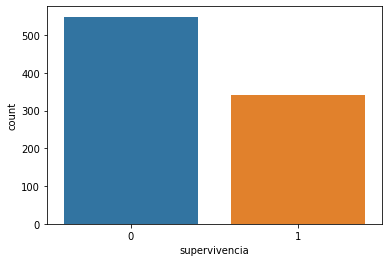

In [33]:
sns.countplot('supervivencia',data=df)
plt.show()

# Peguntas

### 1. Cuál fue la tasa de supervivencia de las personas a bordo del Titanic?

In [34]:
df.groupby('supervivencia').count()

,id_pasajero,clase,nombre,sexo,edad,hermanos_esposos,padres_ninos,ticket,precio,puerto
supervivencia,,,,,,,,,,
0,549,549,549,549,549,549,549,549,549,549
1,342,342,342,342,342,342,342,342,342,342


In [35]:
342/891

0.3838383838383838

Tenemos que de un total de 891 pasajeros de los cuales se tiene informacion sobrevivieron únicamente un 38%


### 2. Cuál fue la edad promedio de los pasajeros a bordo del Titanic?

In [36]:
df.edad.mean()

29.36158249158249

### 3. Cuál es la proporción de sobrevivientes por genero a bordo del Titanic?

In [37]:
df[['sexo','supervivencia']].groupby(['sexo']).count()

,supervivencia
sexo,
femenino,314
masculino,577


In [38]:
df[['sexo','supervivencia']].groupby(['sexo']).mean()

,supervivencia
sexo,
femenino,0.742038
masculino,0.188908


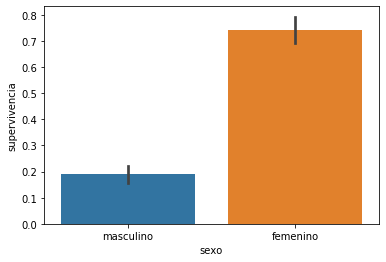

In [39]:
sns.barplot(x='sexo', y='supervivencia', data=df)

C:\Users\marce\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


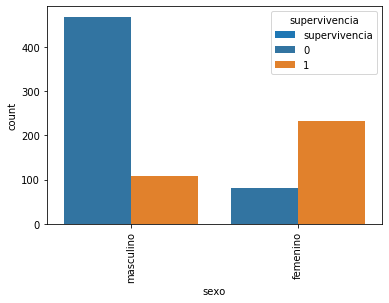

In [40]:
df[['sexo','supervivencia']].groupby(['sexo']).mean().plot.bar()
sns.countplot('sexo',hue='supervivencia',data=df,)
plt.show()

### 3. Cuál es la clase a bordo del Titanic que tuvo mayor tasa de sobrevivir?

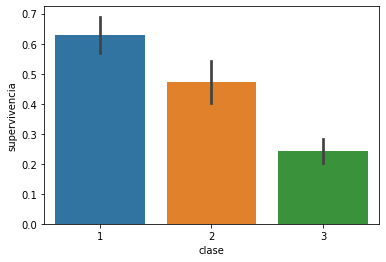

In [42]:
sns.barplot(x='clase',y='supervivencia', data=df)

C:\Users\marce\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


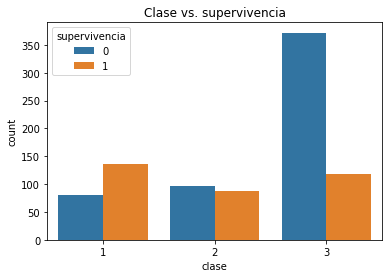

In [170]:
sns.countplot('clase', hue='supervivencia', data=df)
plt.title('Clase vs. supervivencia')
plt.show()

C:\Users\marce\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\marce\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


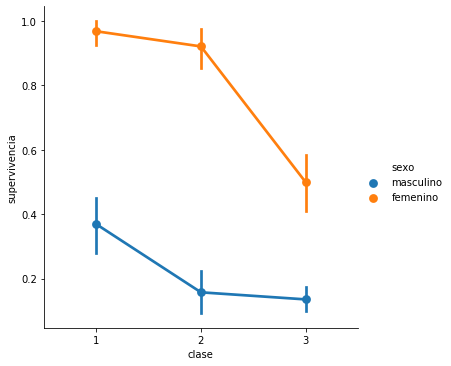

In [143]:
sns.factorplot('clase', 'supervivencia', hue='sexo', data=df)
plt.show()

Al observar FactorPlot, está claro que la tasa de supervivencia de las mujeres en la Clase 1 es de alrededor del 95-96%, ya que solo 3 de 94 mujeres murieron. 
Por lo tanto, ahora está más claro que, independientemente de la Clase, las mujeres tienen la primera prioridad durante ell rescate. 


### 4. Cuánto costaba el ticket promedio a bordo del Titanic?

In [172]:
print('El valor del ticket promedio a bordo del titanic fue:',df['precio'].mean())

El valor del ticket promedio a bordo del titanic fue: 32.2042079685746


### 5. Estaba Jack o Rose a bordo del Titanic?

In [173]:
df.columns

Index(['id_pasajero', 'supervivencia', 'clase', 'nombre', 'sexo', 'edad',
       'hermanos_esposos', 'padres_ninos', 'ticket', 'precio', 'puerto'],
      dtype='object')

In [174]:
df.nombre

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: nombre, Length: 891, dtype: object

In [186]:
df[df.nombre.str.contains('jack')]

,id_pasajero,supervivencia,clase,nombre,sexo,edad,hermanos_esposos,padres_ninos,ticket,precio,puerto


In [187]:
df[df.nombre.str.contains('jac')]

,id_pasajero,supervivencia,clase,nombre,sexo,edad,hermanos_esposos,padres_ninos,ticket,precio,puerto
313,314,0,3,"Hendekovic, Mr. Ignjac",masculino,28.0,0,0,349243,7.8958,S


In [188]:
df[df.nombre.str.contains('rose')]

,id_pasajero,supervivencia,clase,nombre,sexo,edad,hermanos_esposos,padres_ninos,ticket,precio,puerto
72,73,0,2,"Hood, Mr. Ambrose Jr",masculino,21.0,0,0,S.O.C. 14879,73.5,S


### Otros datos interesantes de la base del titanic

In [189]:
print('La persona con mayor edad en sobrevivir el titanic tuvo:',df['edad'].max())
print('La persona con menor edad en sobrevivir el titanic tuvo:',df['edad'].min())

La persona con mayor edad en sobrevivir el titanic tuvo: 80.0
La persona con menor edad en sobrevivir el titanic tuvo: 0.42
